In [1]:
import pandas as pd
import numpy as np
import os
import sklearn.preprocessing

import scipy.stats

import matplotlib.pyplot as plt
import matplotlib

In [2]:
# to show the whole datafram when use .head()
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
pd.set_option('display.width', 10000)

In [3]:
path = 'ticks_201910/'

In [4]:
#path = r'/Users/sujiaqi/Desktop/last semester courses/jgl/project/ticks_201910'
list_VXX = []
list_SPY = []
list_VXX_date = []
list_SPY_date = []
for (root, dirs, files) in os.walk(path):
    for file in files:
        Dr_type = file.split("_")[1]
        #print(Dr_type)
        if Dr_type == 'VXX':
            list_VXX.append(file)
            date = file.split("_")[2].split(".")[0]
            list_VXX_date.append(date)
        elif Dr_type == 'SPY':
            list_SPY.append(file)
            date = file.split("_")[2].split(".")[0]
            list_SPY_date.append(date)

In [5]:
list_SPY.sort()
list_VXX.sort()
list_SPY_date.sort()
list_VXX_date.sort()

Date:  20191001
maximum negative correlation is  -3.33983570459549e-05
vxx delayed ticket number is  1
maximum positive correlation is  9.483144935464333e-06
vxx delayed ticket number is  693


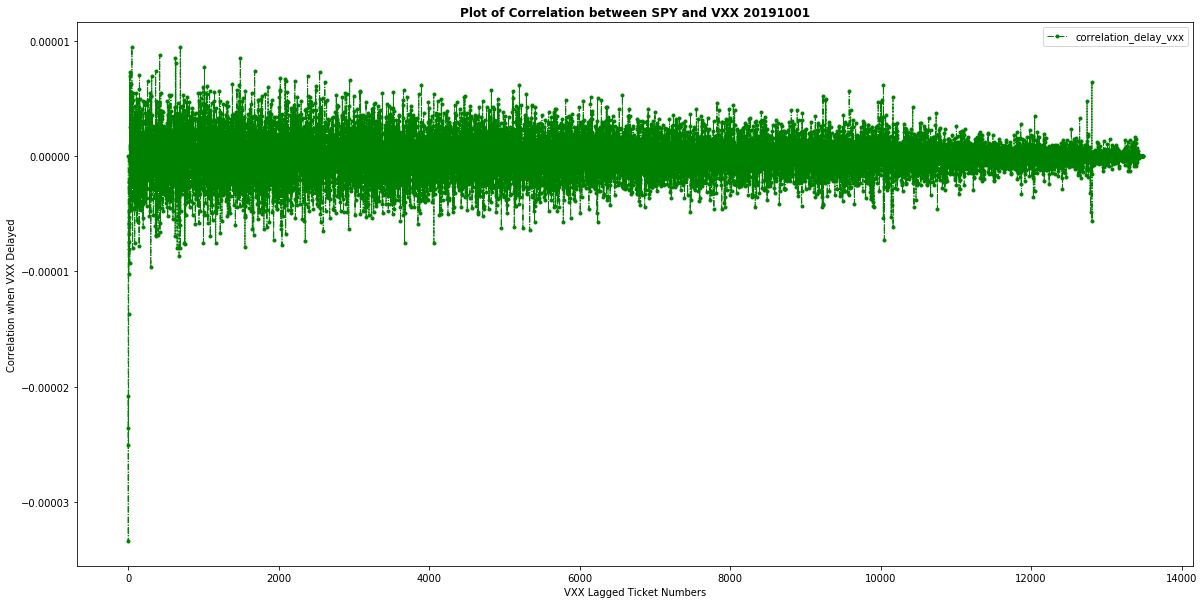

Date:  20191002
maximum negative correlation is  -2.743179951487003e-05
vxx delayed ticket number is  1
maximum positive correlation is  8.04805200286948e-06
vxx delayed ticket number is  2516


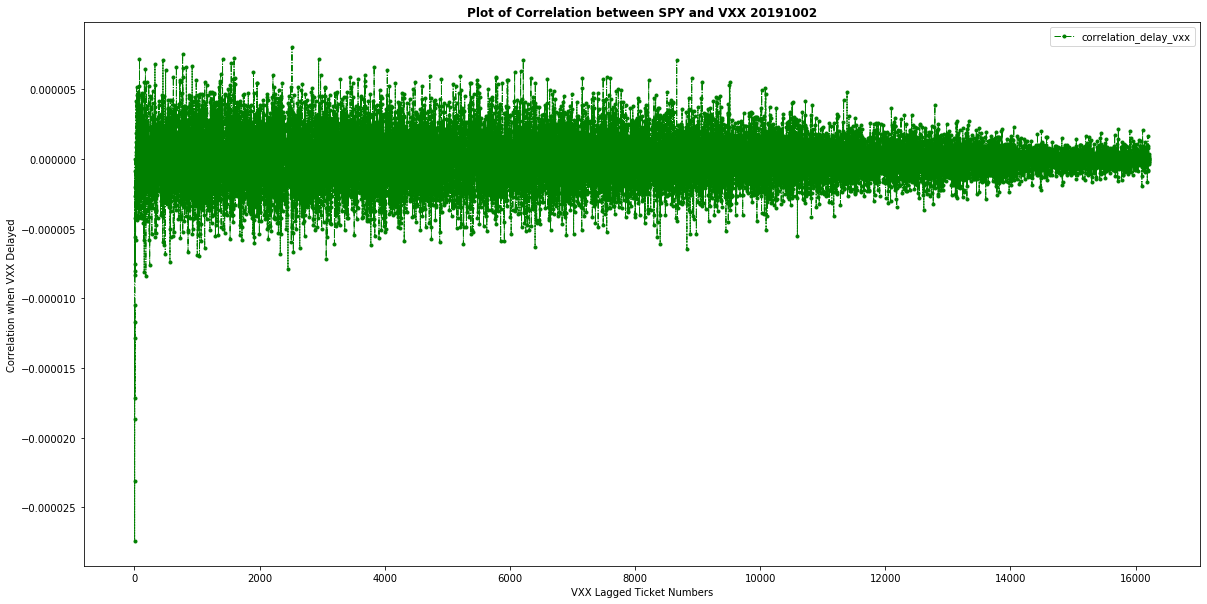

Date:  20191003
maximum negative correlation is  -5.462262560820953e-05
vxx delayed ticket number is  1
maximum positive correlation is  2.1167032370762587e-05
vxx delayed ticket number is  3391


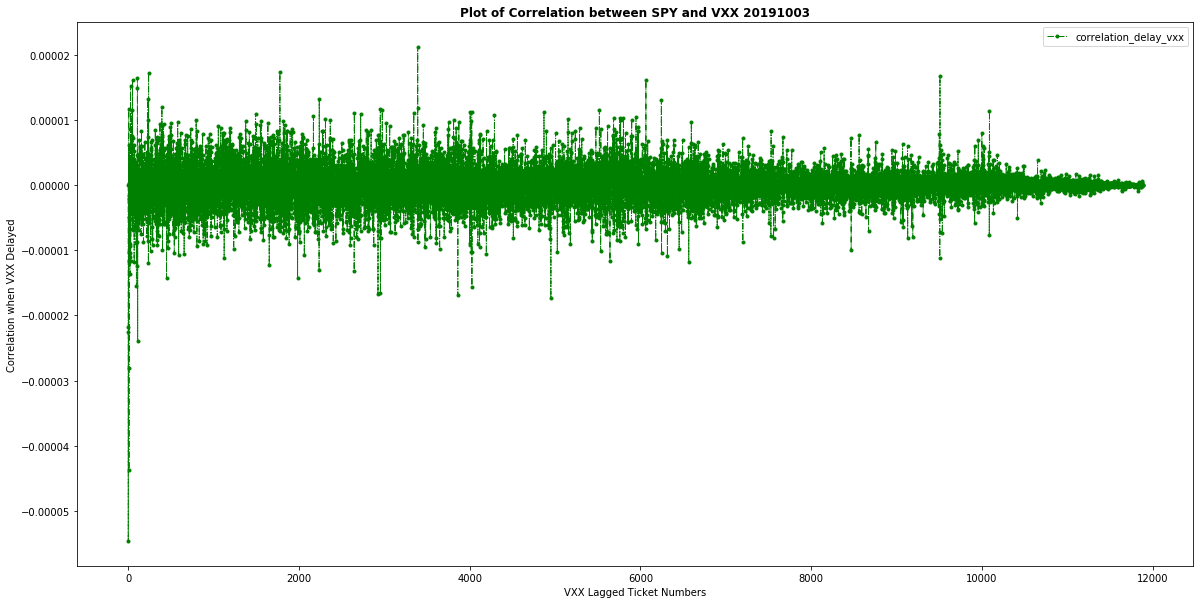

Date:  20191004
maximum negative correlation is  -1.4222213526450706e-05
vxx delayed ticket number is  3
maximum positive correlation is  5.722282412445226e-06
vxx delayed ticket number is  2939


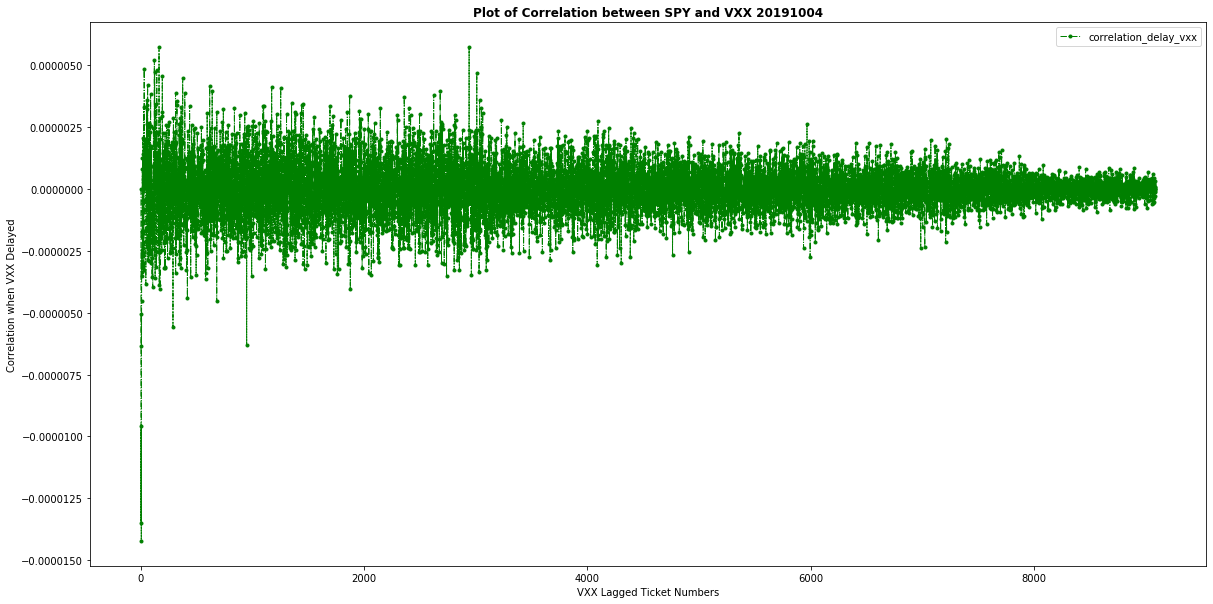

Date:  20191007
maximum negative correlation is  -4.013717570250253e-06
vxx delayed ticket number is  2
maximum positive correlation is  2.7407391369328395e-06
vxx delayed ticket number is  1179


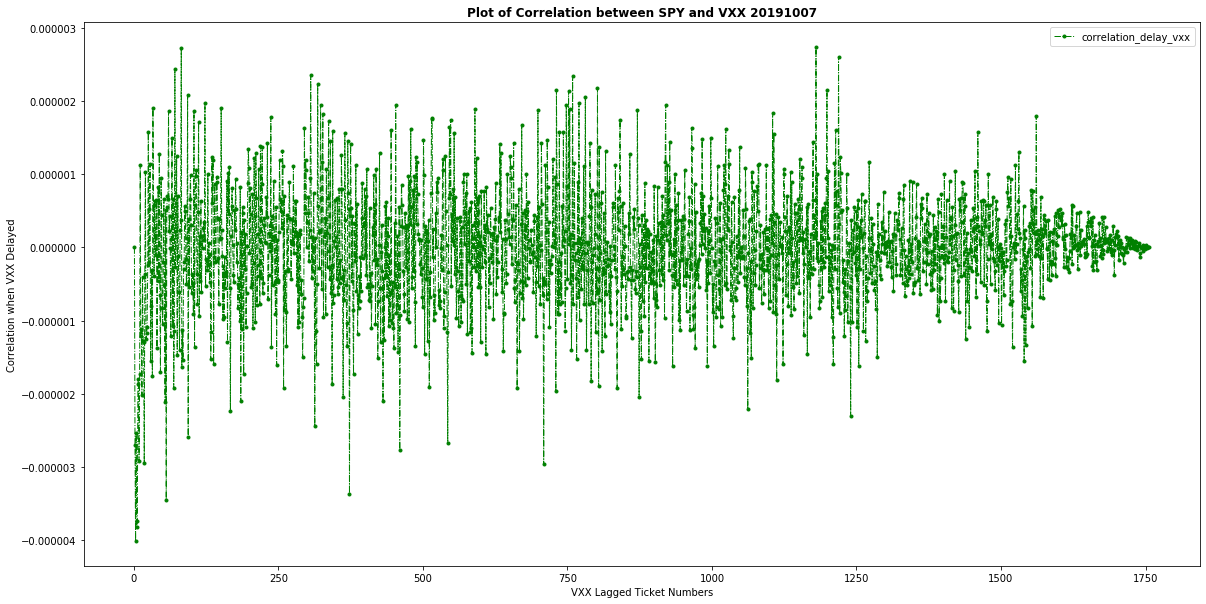

Date:  20191008
maximum negative correlation is  -3.189361047806069e-05
vxx delayed ticket number is  1
maximum positive correlation is  2.4492072645464004e-05
vxx delayed ticket number is  67


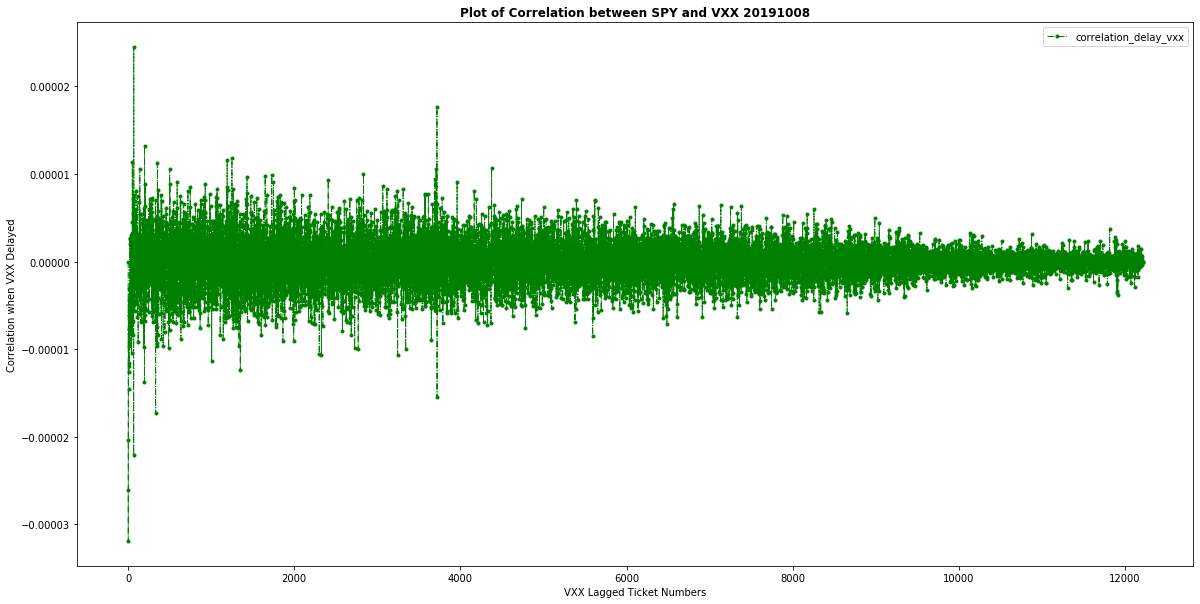

Date:  20191009
maximum negative correlation is  -8.844891919533617e-06
vxx delayed ticket number is  1
maximum positive correlation is  5.42047712646705e-06
vxx delayed ticket number is  130


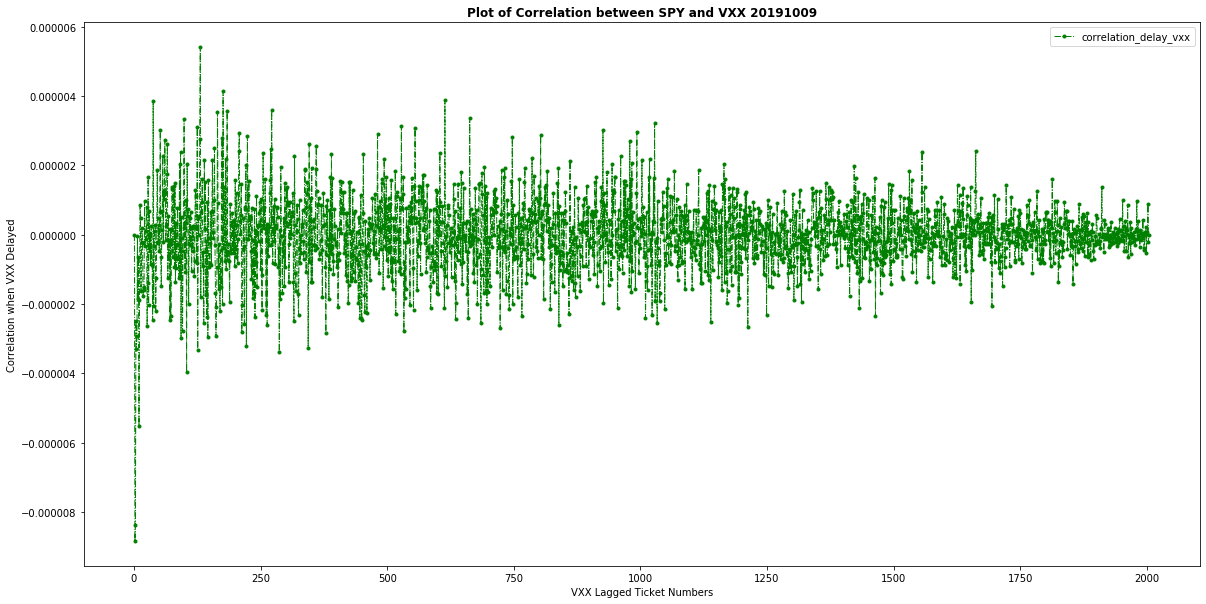

Date:  20191010
maximum negative correlation is  -1.4534775001508298e-05
vxx delayed ticket number is  3
maximum positive correlation is  8.83603132487635e-06
vxx delayed ticket number is  541


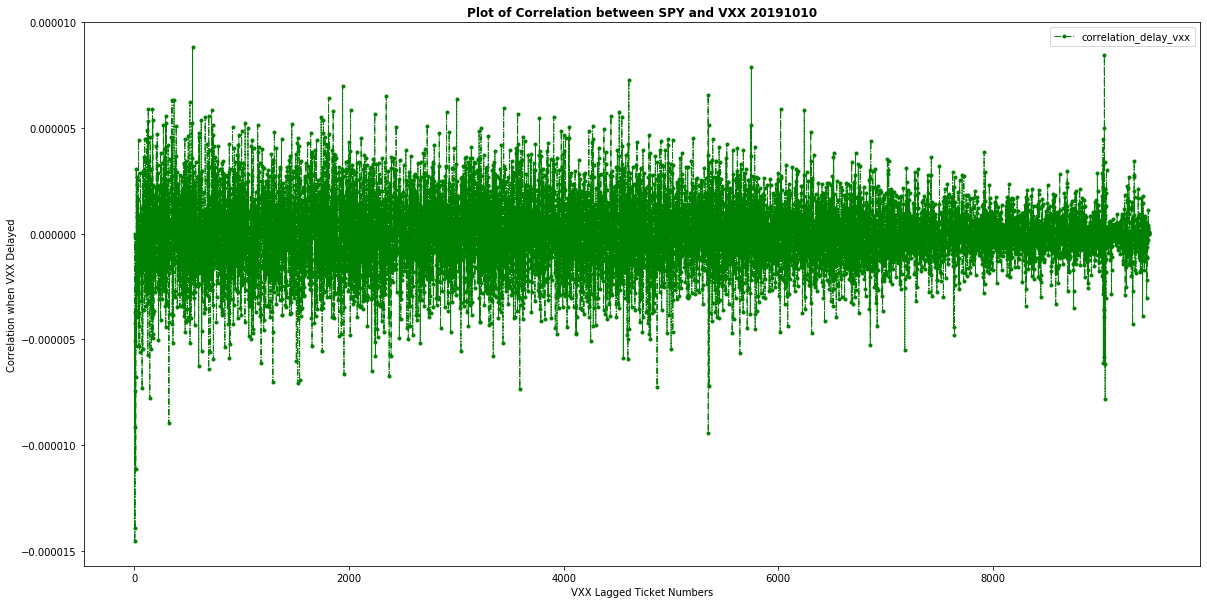

Date:  20191011
maximum negative correlation is  -2.1110120667311524e-05
vxx delayed ticket number is  1
maximum positive correlation is  9.631285151952347e-06
vxx delayed ticket number is  710


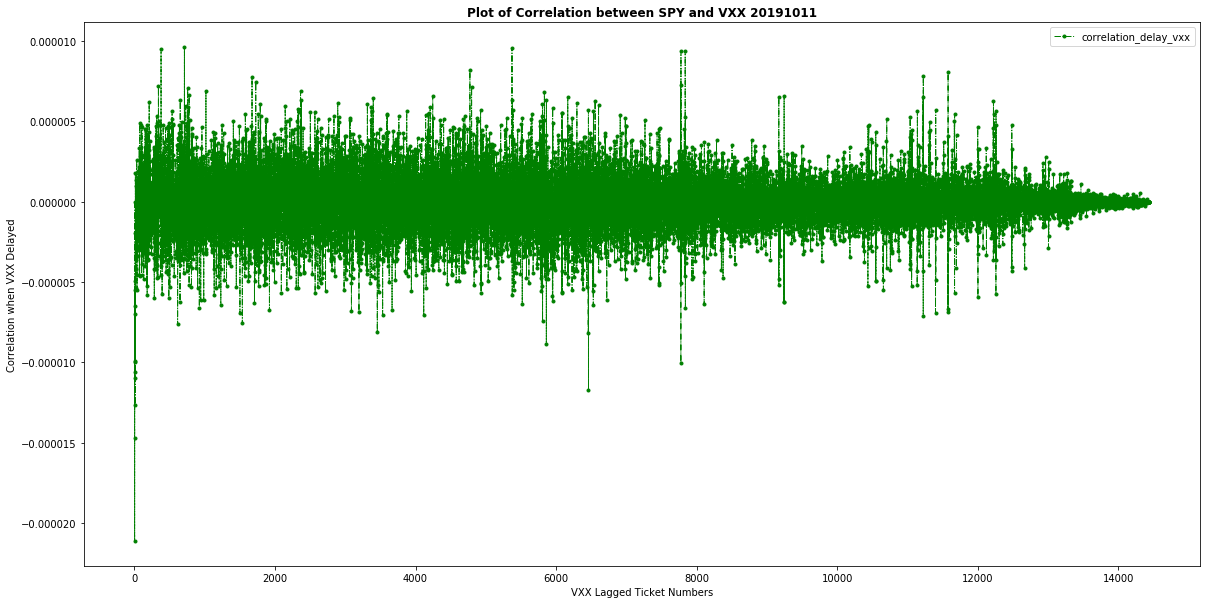

Date:  20191014
maximum negative correlation is  -6.858255361474902e-06
vxx delayed ticket number is  2
maximum positive correlation is  3.847742440295665e-06
vxx delayed ticket number is  4049


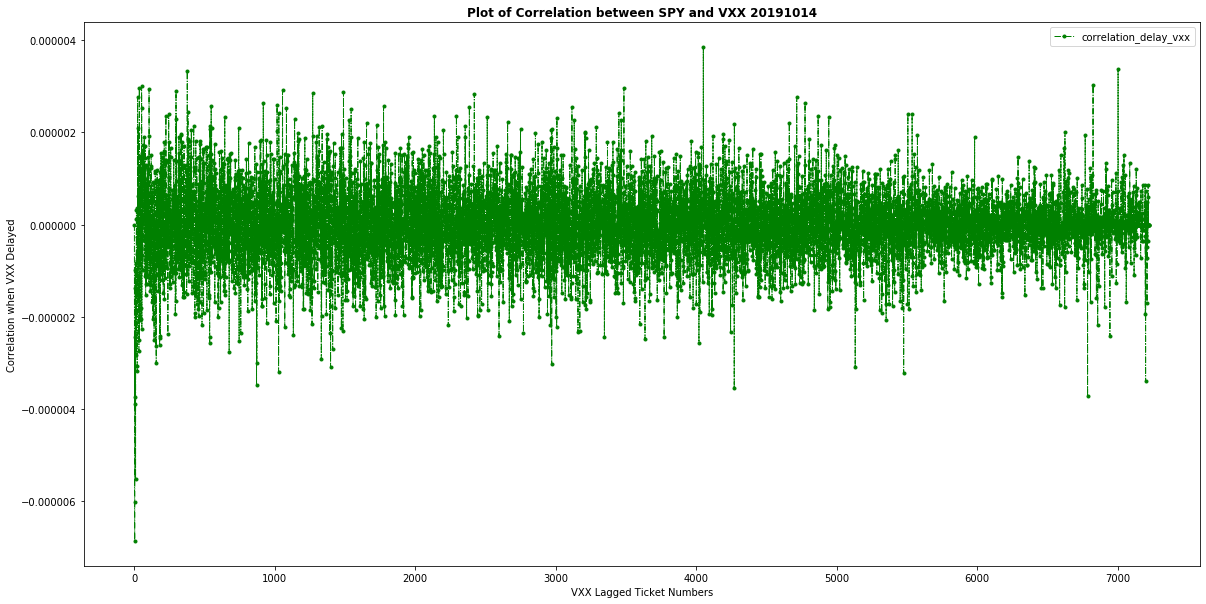

Date:  20191015
maximum negative correlation is  -3.6640716948966447e-06
vxx delayed ticket number is  4
maximum positive correlation is  3.085703122561184e-06
vxx delayed ticket number is  482


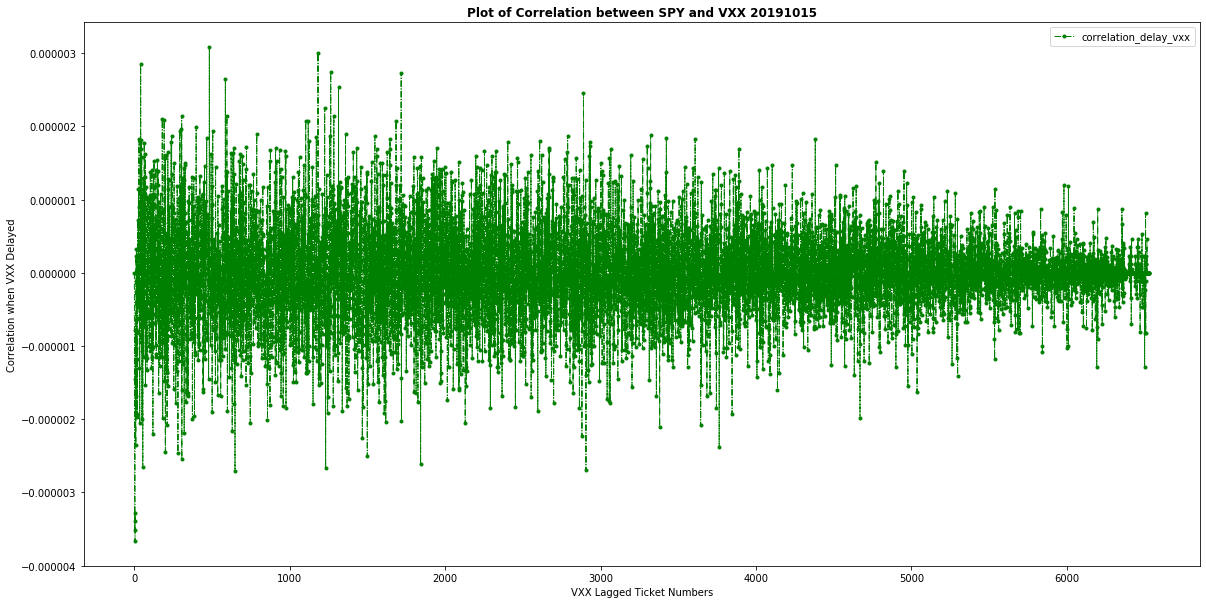

Date:  20191016
maximum negative correlation is  -4.9428905552634225e-06
vxx delayed ticket number is  67
maximum positive correlation is  4.521973956554056e-06
vxx delayed ticket number is  2753


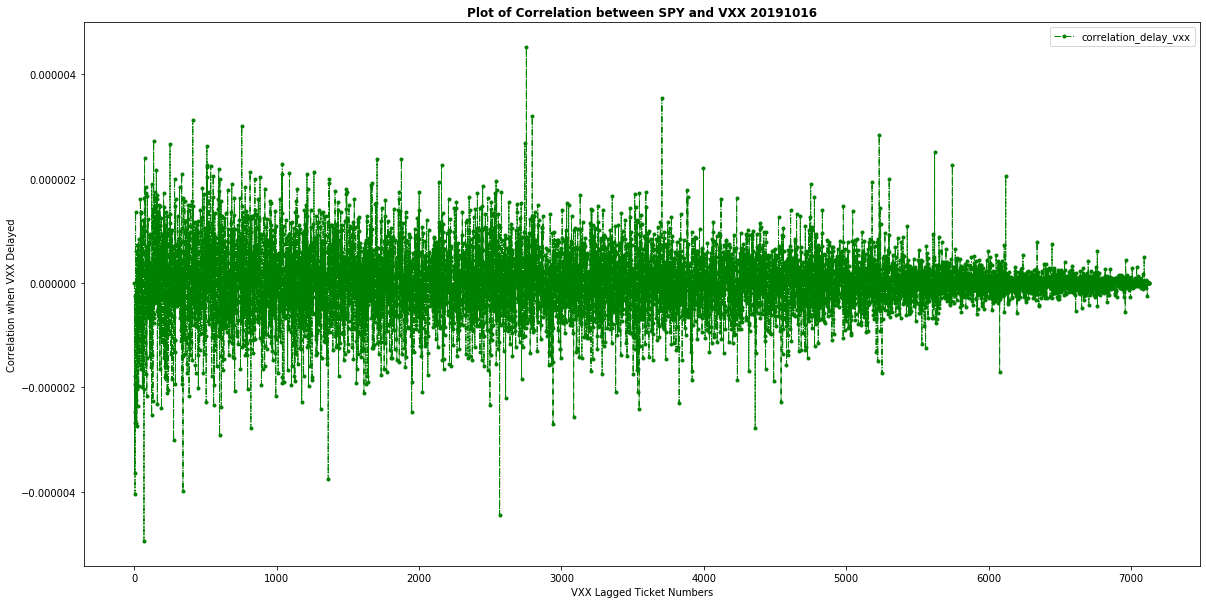

Date:  20191017
maximum negative correlation is  -4.784046075269397e-06
vxx delayed ticket number is  1
maximum positive correlation is  4.5913801523021525e-06
vxx delayed ticket number is  53


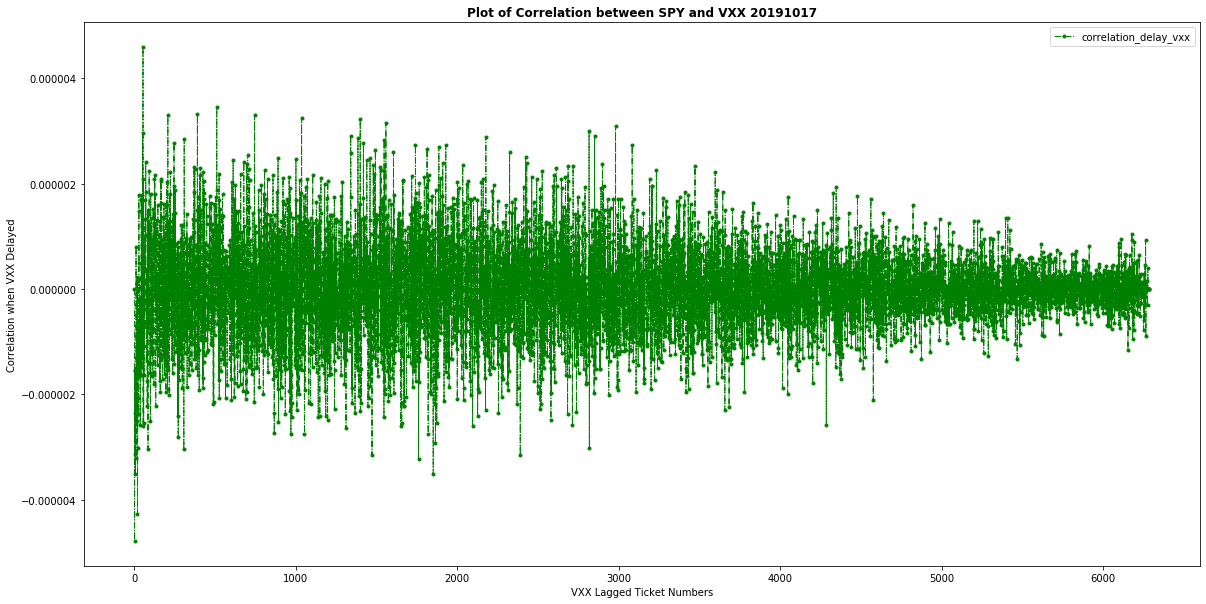

Date:  20191018
maximum negative correlation is  -1.1521977042576948e-05
vxx delayed ticket number is  1
maximum positive correlation is  3.626327449436358e-06
vxx delayed ticket number is  880


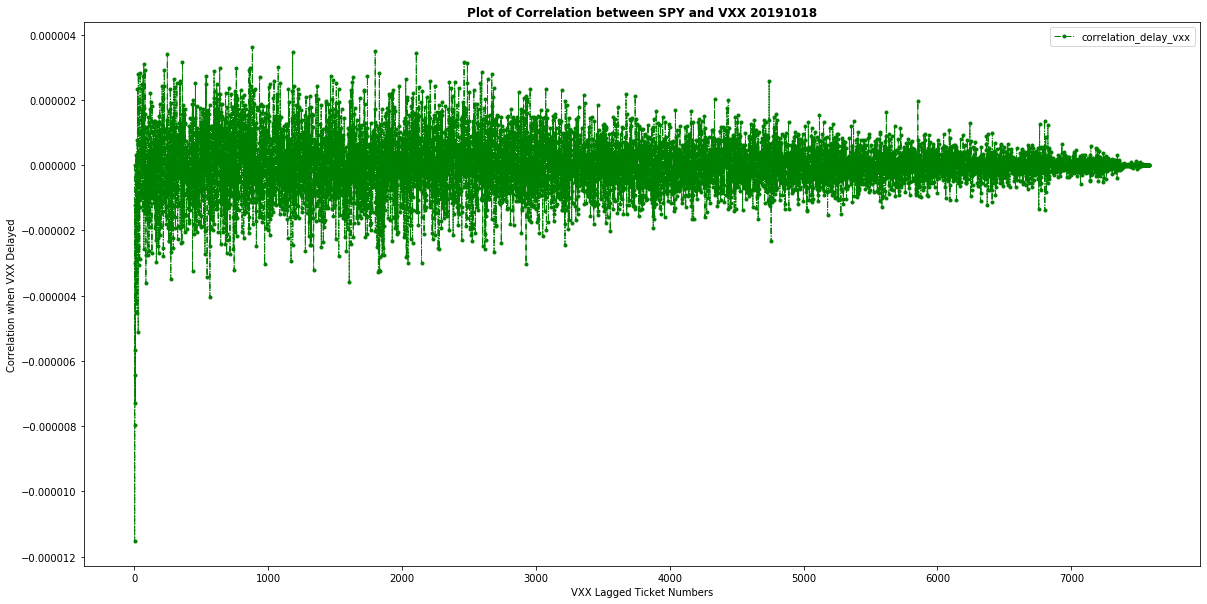

Date:  20191021
maximum negative correlation is  -5.144794919139959e-06
vxx delayed ticket number is  1
maximum positive correlation is  3.85037245117966e-06
vxx delayed ticket number is  80


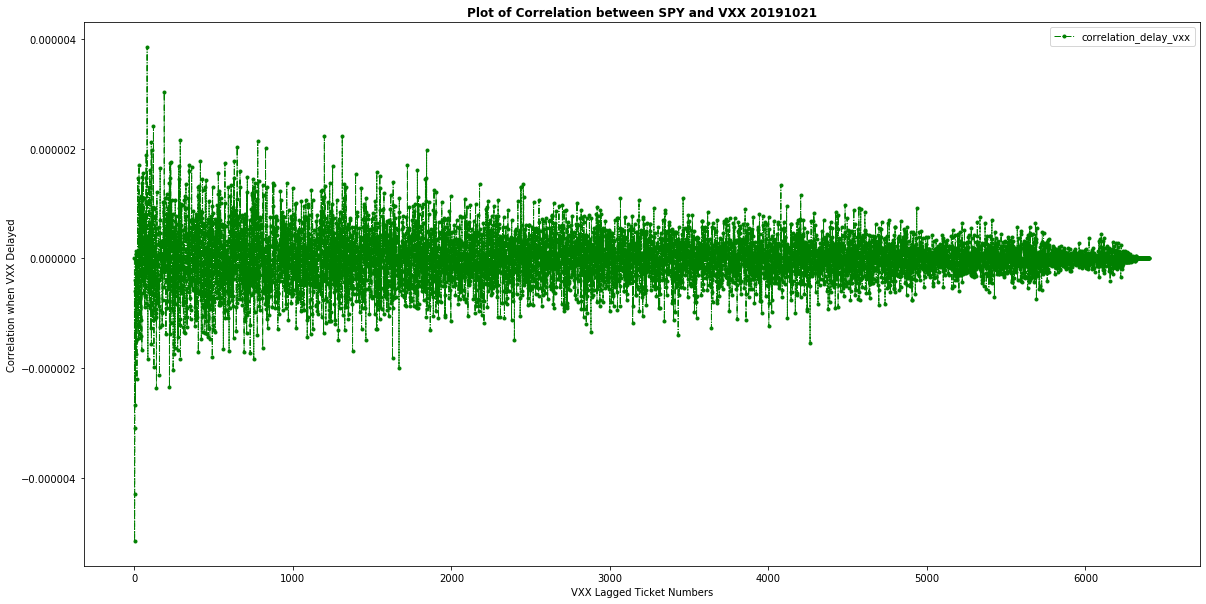

Date:  20191022
maximum negative correlation is  -8.87744192556643e-06
vxx delayed ticket number is  1
maximum positive correlation is  3.373089244054273e-06
vxx delayed ticket number is  1004


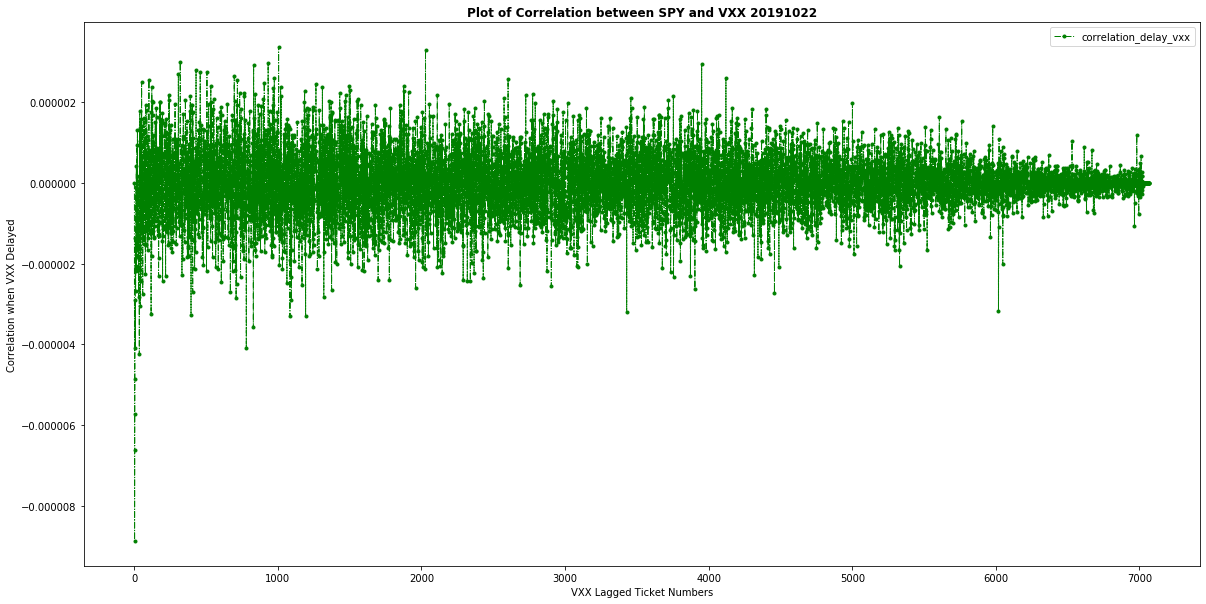

Date:  20191023
maximum negative correlation is  -8.678124958160805e-06
vxx delayed ticket number is  1
maximum positive correlation is  2.4180594771112163e-06
vxx delayed ticket number is  1303


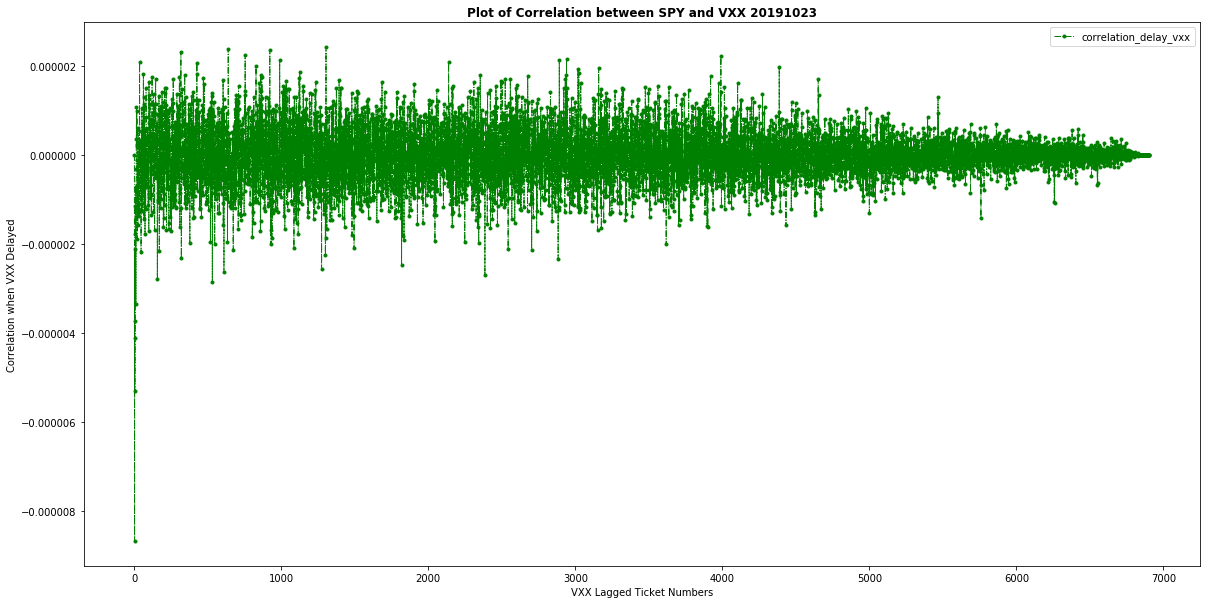

Date:  20191024
maximum negative correlation is  -5.105333589589897e-06
vxx delayed ticket number is  2
maximum positive correlation is  3.401521962385679e-06
vxx delayed ticket number is  717


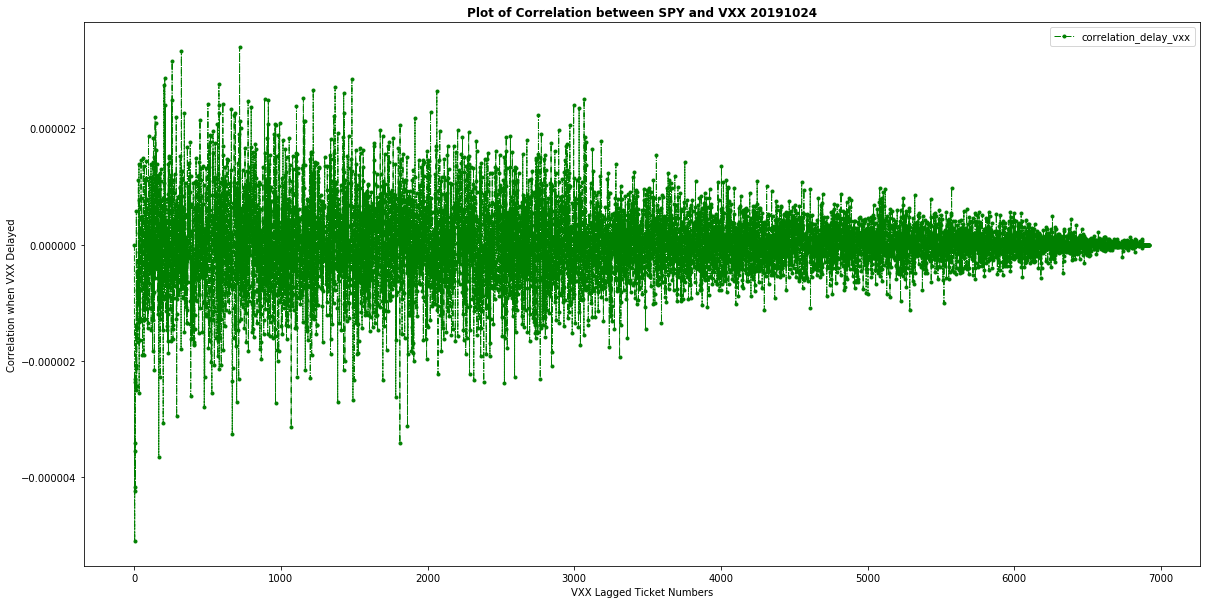

Date:  20191025
maximum negative correlation is  -3.963449278624645e-06
vxx delayed ticket number is  1
maximum positive correlation is  2.5366200350326365e-06
vxx delayed ticket number is  356


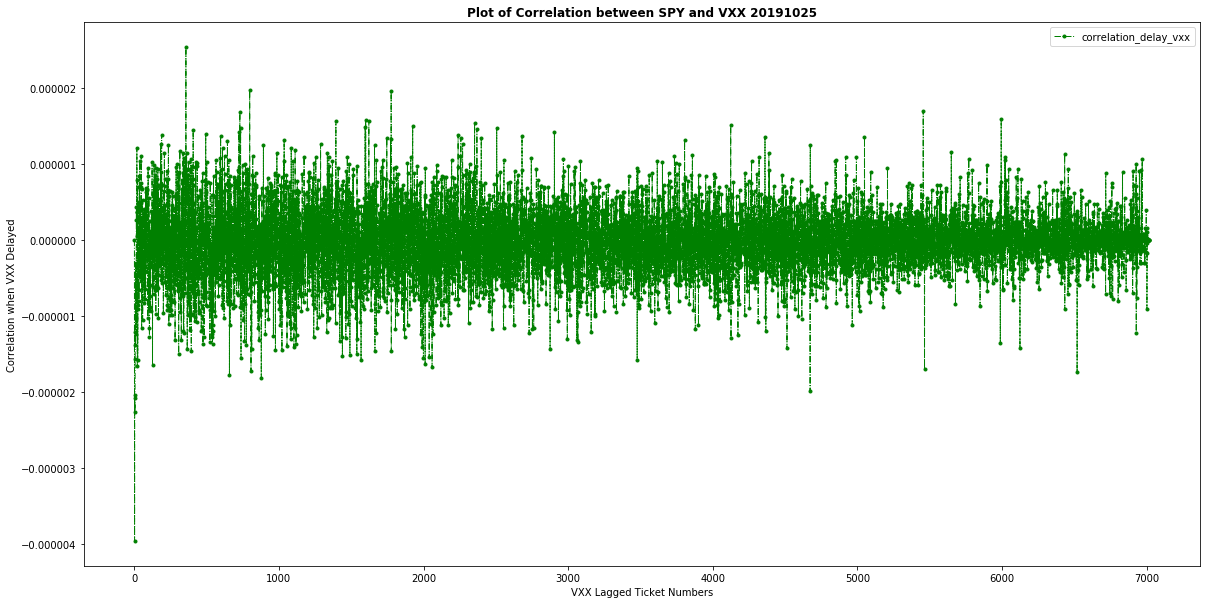

Date:  20191028
maximum negative correlation is  -3.839871758424732e-06
vxx delayed ticket number is  1
maximum positive correlation is  2.3467842294622064e-06
vxx delayed ticket number is  308


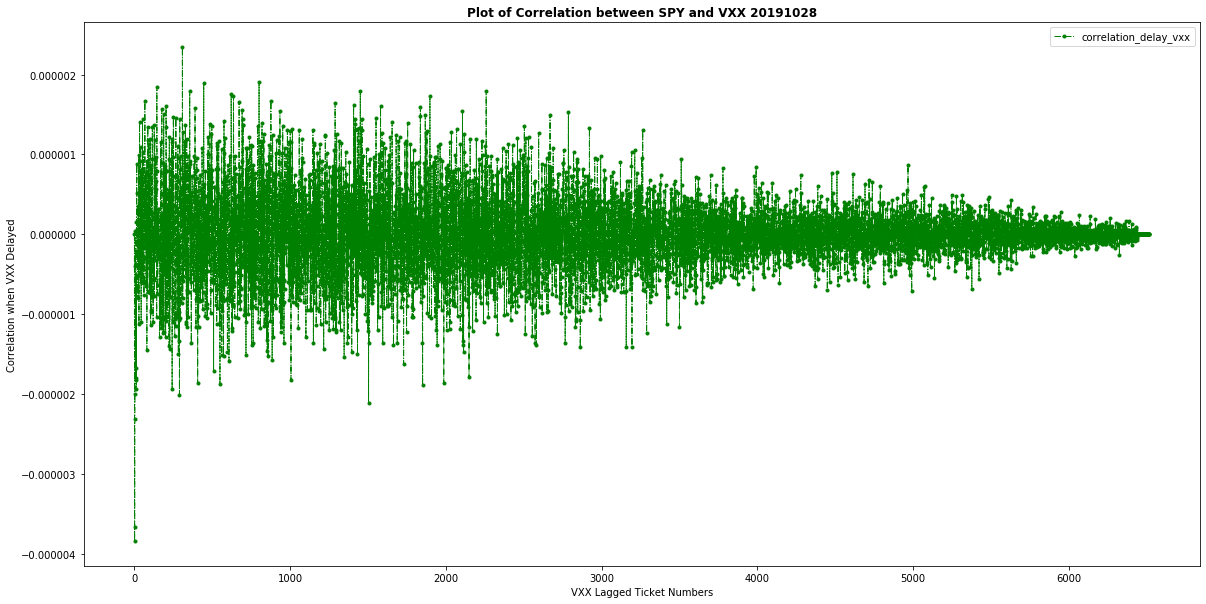

Date:  20191029
maximum negative correlation is  -6.895140994083642e-06
vxx delayed ticket number is  2
maximum positive correlation is  3.6242983132504557e-06
vxx delayed ticket number is  967


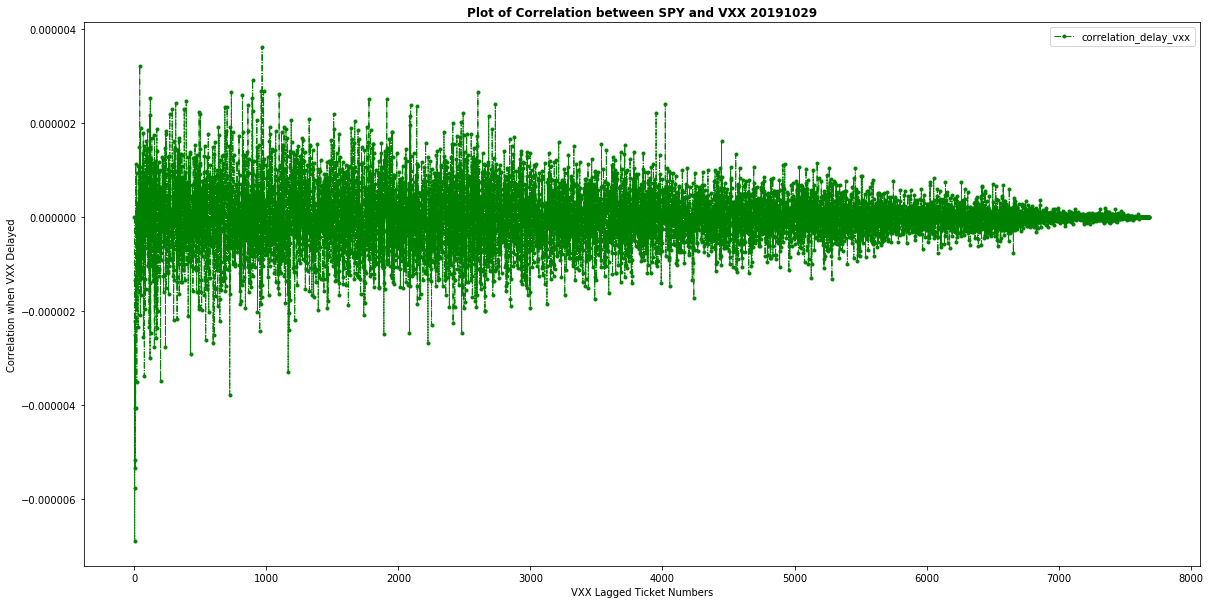

Date:  20191030
maximum negative correlation is  -8.533853012767103e-06
vxx delayed ticket number is  2
maximum positive correlation is  6.5794971741927055e-06
vxx delayed ticket number is  1259


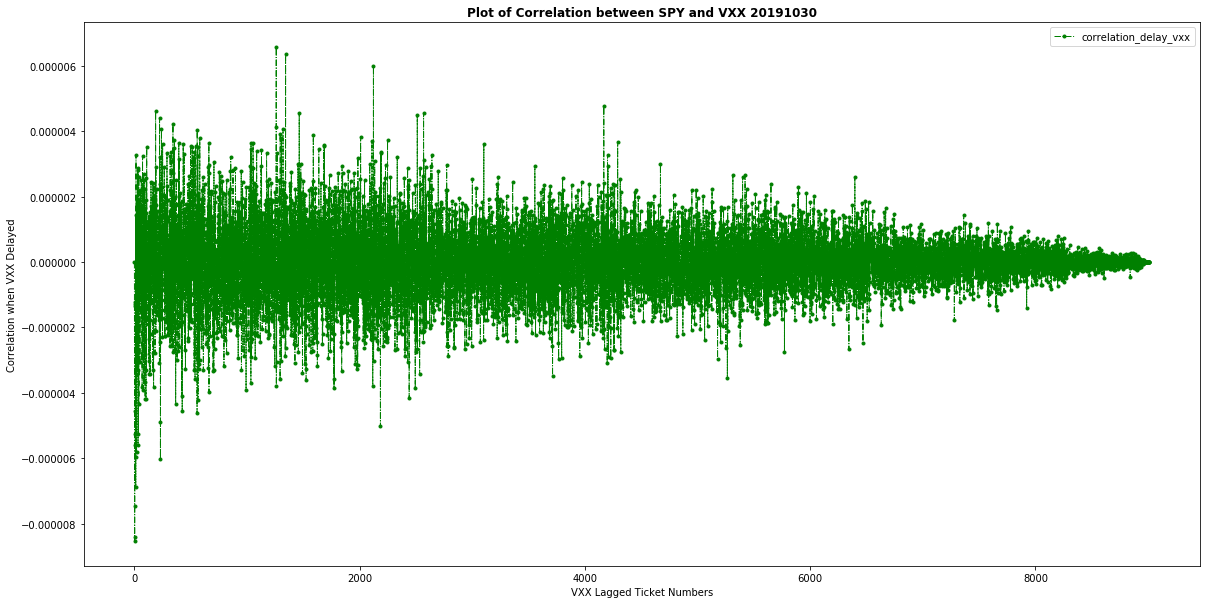

Date:  20191031
maximum negative correlation is  -1.2267350876689145e-05
vxx delayed ticket number is  2
maximum positive correlation is  4.646837093988572e-06
vxx delayed ticket number is  833


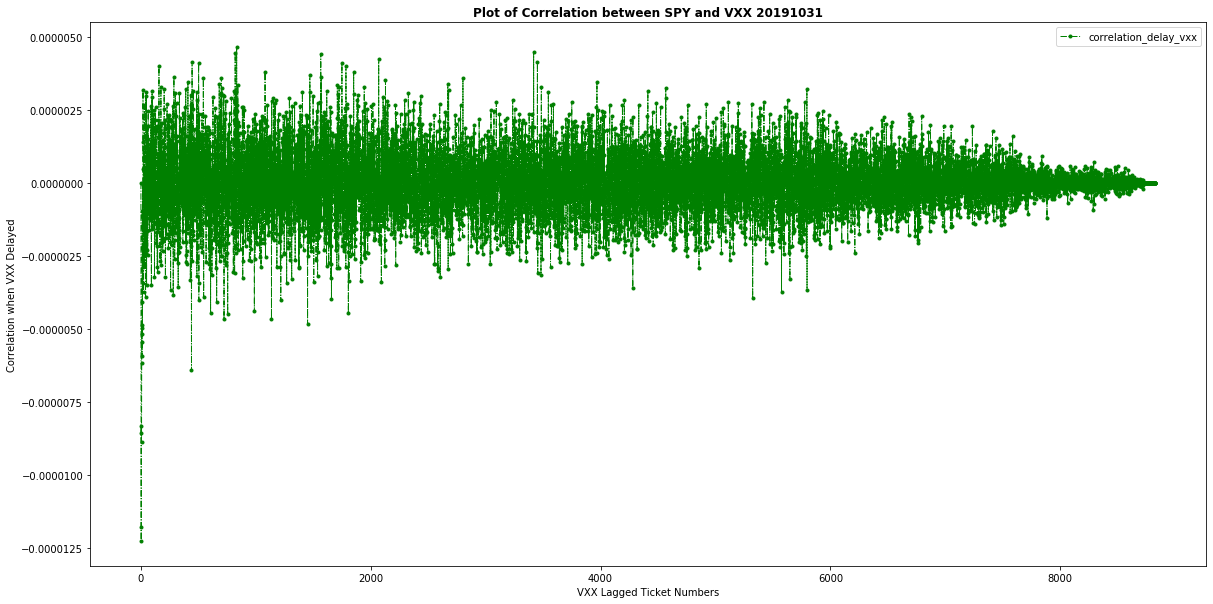

Date:  20191101
maximum negative correlation is  -3.2095698932336008e-06
vxx delayed ticket number is  1
maximum positive correlation is  2.2026165470518633e-06
vxx delayed ticket number is  75


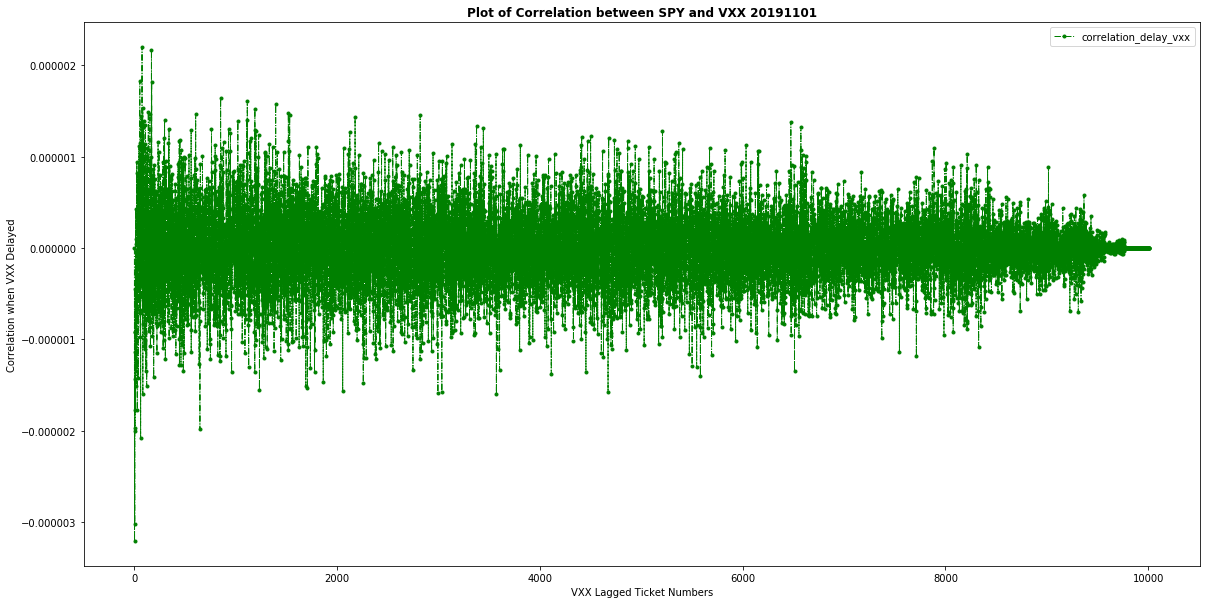

In [6]:
for date in list_SPY_date:
    vxx_df = pd.read_csv(path + 'tick_VXX_'+ date +'.txt', header = None)
    spy_df = pd.read_csv(path + 'tick_SPY_'+ date +'.txt', header = None)
    
    vxx_df = vxx_df[[0,5]]
    spy_df = spy_df[[0,5]]
    
    vxx_df.rename(columns={0:'date', 5:'price_vxx'}, inplace = True)
    spy_df.rename(columns={0:'date', 5:'price_spy'}, inplace = True)
    
    spy_vxx_df = pd.merge(vxx_df, spy_df, on=['date'], how="outer",sort=True)  
    spy_vxx_df.ffill(axis = 0, inplace = True)
    
    # spy_vxx_df.to_csv('spy_vxx_price_'+ date +'.csv')
    
    spy_vxx_df.dropna(inplace = True)
    
    spy_vxx_df.reset_index(drop = True,inplace=True)
    
    spy_vxx_df['time'] = spy_vxx_df['date'].map(lambda x: x.split(' ')[1])
    spy_vxx_df['date'] = spy_vxx_df['date'].map(lambda x: x.split(' ')[0])
    
    spy_vxx_df['vxx_pct_chg'] = spy_vxx_df["price_vxx"].pct_change()
    spy_vxx_df['spy_pct_chg'] = spy_vxx_df["price_spy"].pct_change()
    
    
    spy_vxx_df.dropna(inplace = True)
    
    corr_list = []
    for i in range(1,len(spy_vxx_df['vxx_pct_chg'])+1,1):
        corr = np.correlate(spy_vxx_df['vxx_pct_chg'][i:], spy_vxx_df['spy_pct_chg'][:-(i-1)])[0]
        i = i + 1
        corr_list.append(corr)
    
    
    spy_vxx_df['correlation_delay_vxx'] = corr_list
    print('Date: ', date)
    print('maximum negative correlation is ', min(corr_list))
    print('vxx delayed ticket number is ', corr_list.index(min(corr_list)))
    print('maximum positive correlation is ', max(corr_list))
    print('vxx delayed ticket number is ', corr_list.index(max(corr_list)))
    
    plt.figure(figsize=(20, 10))
    #plt.subplot(end_wk-start_wk+1, 1,week-14)
    plt.plot(range(1,len(spy_vxx_df['correlation_delay_vxx'])+1,1), spy_vxx_df['correlation_delay_vxx'],color='green', marker='o', 
         linestyle='dashdot', linewidth=1, markersize=3, label = 'correlation_delay_vxx')
    
    plt.xlabel('VXX Lagged Ticket Numbers')
    plt.ylabel('Correlation when VXX Delayed')
    #plt.rcParams['figure.figsize'] = (22.0, 16.0)
    plt.legend()
    plt.title('Plot of Correlation between SPY and VXX '+ str(date), fontsize ='large', fontweight='bold')
    plt.show()
